# Sage Shaw

### ME 571 - Spring 2018

# HW 3 - Problem 3

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# Donna's Node Centered

In [79]:
%%bash
mpicc demo_util.c hw3p3_node.c -o bin/hw3p3_node -lm
mpirun -n 4 bin/hw3p3_node -p 3 --itermax 5 --tol 1.0e-10 > csv/results_node_CG.csv

iterations: 5
residual: 1.10507
nodes: 33
error: 3.40059


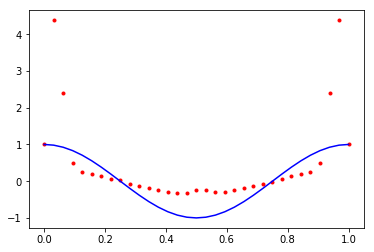

In [80]:
A = np.genfromtxt('csv/results_node_CG.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

In [93]:
def cg_solve(A, x, b, tol, max_iter=10**9):
    #n = len(x)
    #N = int(np.sqrt(n))
    #assert N**2 == n
    #assert N>= 3
    x_old = x
    r = b - A@x
    res_norms = [np.linalg.norm(r)]
    
    iterations = 1
    delta = np.dot(r, r)
    print(delta)
    b_delta = np.dot(b,b)
    p = r
    print(p)
    
    while delta > b_delta * tol**2 and iterations <= max_iter:
        s = A.dot(p)
        
        alpha = delta/np.dot(p,s)
        print('alpha: %f'%alpha)
        x_new = x_old + alpha*p
        if iterations==1: print(x_new)
        r -= alpha * s
        res_norms.append(np.linalg.norm(r))
        delta_new = np.dot(r,r)
        p = r + delta_new/delta * p
        x_old, delta = x_new, delta_new
        iterations += 1
    #cond = (1+np.cos(np.pi/(N+1)))/(1-np.cos(np.pi/(N+1)))
    return x_new, iterations, res_norms

2.736365958319424
[ 1.14247384e+00  1.09044753e-01  5.90145951e-02  9.44279644e-18
 -5.90145951e-02 -1.09044753e-01 -1.42473836e-01 -1.54212569e-01
 -1.42473836e-01 -1.09044753e-01 -5.90145951e-02 -2.83283893e-17
  5.90145951e-02  1.09044753e-01  1.14247384e+00]
alpha: 0.573313
[ 6.54995482e-01  6.25168108e-02  3.38338542e-02  5.41368109e-18
 -3.38338542e-02 -6.25168108e-02 -8.16821496e-02 -8.84121216e-02
 -8.16821496e-02 -6.25168108e-02 -3.38338542e-02 -1.62410433e-17
  3.38338542e-02  6.25168108e-02  6.54995482e-01]
alpha: 0.267549
3


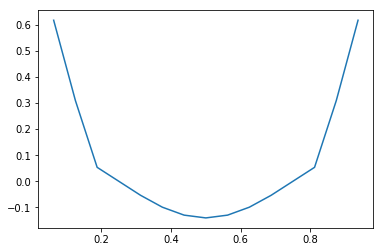

In [94]:
def foo(x):
    return -(2*np.pi)**2*np.cos(2*np.pi*x)

N = 15
h = 1/(N+1)
xs = np.linspace(h,1-h,N)
A = np.diag([2]*N) + np.diag([-1]*(N-1),k=1) + np.diag([-1]*(N-1),k=-1)
b = np.array([-h**2*foo(xi) for xi in xs])
b[0] += 1
b[-1] += 1

u = np.zeros(N)
u_new, iterations, res_norms = cg_solve(A,u, b, tol=10**-5, max_iter=2)
plt.plot(xs, u_new)
print(iterations)

In [50]:
print(xs)

[0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625 0.625
 0.6875 0.75   0.8125 0.875  0.9375]
